# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [104]:
df = pd.read_csv("C:/Users/nithi/OneDrive/Desktop/excelr project/BANK.csv")

In [74]:
df

Unnamed: 0  industrial_risk  management_risk  financial_flexibility  \
0             0              0.5              1.0                    0.0   
1             1              0.0              1.0                    0.0   
2             2              1.0              0.0                    0.0   
3             3              0.5              0.0                    0.0   
4             4              1.0              1.0                    0.0   
5             5              1.0              1.0                    0.0   
6             6              1.0              1.0                    0.0   
7             7              1.0              1.0                    0.0   
8             8              1.0              1.0                    0.0   
9             9              1.0              1.0                    0.0   
10           10              1.0              1.0                    0.5   
11           11              0.0              1.0                    0.0   
12           12              0.5              1.0                    0.0   
13           13              1.0              1.0                    0.0   
14           14              0.0              1.0                    0.0   
15           15              0.5              1.0                    0.0   
16           16              0.5              1.0                    0.0   
17           17              0.5              0.5                    0.0   
18           18              0.5              1.0                    0.0   
19           19              0.0              0.5                    0.0   
20           20              0.0              1.0                    0.0   
21           21              0.0              0.5                    0.0   
22           22              0.0              1.0                    0.0   
23           23              1.0              0.5                    0.0   
24           24              1.0              1.0                    0.0   
25           25              0.5              0.5                    0.0   
26           26              0.5              0.5                    0.0   
27           27              0.0              0.0                    0.0   
28           28              0.5              0.0                    0.0   
29           29              0.0              0.5                    0.0   
30           30              0.5              1.0                    0.0   
31           31              1.0              1.0                    0.0   
32           32              1.0              0.5                    0.0   
33           33              0.0              1.0                    0.0   
34           34              1.0              0.0                    0.0   
35           35              0.5              0.0                    0.0   
36           36              1.0              1.0                    0.0   
37           37              1.0              1.0                    0.0   
38           38              1.0              1.0                    0.0   
39           39              1.0              1.0                    0.0   
40           40              1.0              1.0                    0.0   
41           41              1.0              1.0                    0.0   
42           42              1.0              1.0                    0.0   
43           43              1.0              1.0                    0.0   
44           44              1.0              1.0                    0.5   
45           45              0.0              1.0                    0.0   
46           46              0.5              1.0                    0.0   
47           47              1.0              1.0                    0.0   
48           48              0.0              1.0                    0.0   
49           49              0.0              1.0                    0.0   
50           50              0.5              1.0                    0.0   
51           51              1.0              1.0    

In [78]:
DATA=df.drop(['Unnamed: 0'],axis=1)
DATA

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
5                1.0              1.0                    0.0          0.5   
6                1.0              1.0                    0.0          0.0   
7                1.0              1.0                    0.0          0.0   
8                1.0              1.0                    0.0          0.5   
9                1.0              1.0                    0.0          0.5   
10               1.0              1.0                    0.5          0.0   
11               0.0              1.0                    0.0          0.0   
12               0.5              1.0                    0.0          0.0   
13               1.0              1.0                    0.0          0.0   
14               0.0              1.0                    0.0          0.0   
15               0.5              1.0                    0.0          0.0   
16               0.5              1.0                    0.0          0.0   
17               0.5              0.5                    0.0          0.0   
18               0.5              1.0                    0.0          0.0   
19               0.0              0.5                    0.0          0.0   
20               0.0              1.0                    0.0          0.0   
21               0.0              0.5                    0.0          0.0   
22               0.0              1.0                    0.0          0.0   
23               1.0              0.5                    0.0          0.0   
24               1.0              1.0                    0.0          0.0   
25               0.5              0.5                    0.0          0.0   
26               0.5              0.5                    0.0          0.0   
27               0.0              0.0                    0.0          0.0   
28               0.5              0.0                    0.0          0.0   
29               0.0              0.5                    0.0          0.0   
30               0.5              1.0                    0.0          0.0   
31               1.0              1.0                    0.0          0.0   
32               1.0              0.5                    0.0          0.0   
33               0.0              1.0                    0.0          0.0   
34               1.0              0.0                    0.0          0.0   
35               0.5              0.0                    0.0          0.5   
36               1.0              1.0                    0.0          1.0   
37               1.0              1.0                    0.0          0.0   
38               1.0              1.0                    0.0          0.5   
39               1.0              1.0                    0.0          1.0   
40               1.0              1.0                    0.0          0.0   
41               1.0              1.0                    0.0          0.0   
42               1.0              1.0                    0.0          0.5   
43               1.0              1.0                    0.0          0.5   
44               1.0              1.0                    0.5          0.0   
45               0.0              1.0                    0.0          0.0   
46               0.5              1.0                    0.0          0.0   
47               1.0              1.0                    0.0          0.0   
48               0.0              1.0                    0.0          0.0   
49               0.0              1.0                    0.0          0.0   
50               0.5              1.0                    0.0          0.0   
5

In [79]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   target_variable        250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [80]:
DATA['target_variable']=DATA['target_variable'].astype('category')

In [105]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
labelencoder = LabelEncoder()
DATA.iloc[:, -1] = labelencoder.fit_transform(DATA.iloc[:,-1])
DATA

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0.5              1.0                    0.0          0.0   
1                0.0              1.0                    0.0          0.0   
2                1.0              0.0                    0.0          0.0   
3                0.5              0.0                    0.0          0.5   
4                1.0              1.0                    0.0          0.0   
5                1.0              1.0                    0.0          0.5   
6                1.0              1.0                    0.0          0.0   
7                1.0              1.0                    0.0          0.0   
8                1.0              1.0                    0.0          0.5   
9                1.0              1.0                    0.0          0.5   
10               1.0              1.0                    0.5          0.0   
11               0.0              1.0                    0.0          0.0   
12               0.5              1.0                    0.0          0.0   
13               1.0              1.0                    0.0          0.0   
14               0.0              1.0                    0.0          0.0   
15               0.5              1.0                    0.0          0.0   
16               0.5              1.0                    0.0          0.0   
17               0.5              0.5                    0.0          0.0   
18               0.5              1.0                    0.0          0.0   
19               0.0              0.5                    0.0          0.0   
20               0.0              1.0                    0.0          0.0   
21               0.0              0.5                    0.0          0.0   
22               0.0              1.0                    0.0          0.0   
23               1.0              0.5                    0.0          0.0   
24               1.0              1.0                    0.0          0.0   
25               0.5              0.5                    0.0          0.0   
26               0.5              0.5                    0.0          0.0   
27               0.0              0.0                    0.0          0.0   
28               0.5              0.0                    0.0          0.0   
29               0.0              0.5                    0.0          0.0   
30               0.5              1.0                    0.0          0.0   
31               1.0              1.0                    0.0          0.0   
32               1.0              0.5                    0.0          0.0   
33               0.0              1.0                    0.0          0.0   
34               1.0              0.0                    0.0          0.0   
35               0.5              0.0                    0.0          0.5   
36               1.0              1.0                    0.0          1.0   
37               1.0              1.0                    0.0          0.0   
38               1.0              1.0                    0.0          0.5   
39               1.0              1.0                    0.0          1.0   
40               1.0              1.0                    0.0          0.0   
41               1.0              1.0                    0.0          0.0   
42               1.0              1.0                    0.0          0.5   
43               1.0              1.0                    0.0          0.5   
44               1.0              1.0                    0.5          0.0   
45               0.0              1.0                    0.0          0.0   
46               0.5              1.0                    0.0          0.0   
47               1.0              1.0                    0.0          0.0   
48               0.0              1.0                    0.0          0.0   
49               0.0              1.0                    0.0          0.0   
50               0.5              1.0                    0.0          0.0   
5

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [84]:
scaler.fit(DATA.drop('target_variable',axis=1))

StandardScaler()

In [85]:
scaled_features = scaler.transform(DATA.drop('target_variable',axis=1))
scaled_features

array([[-0.04382742,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
        -0.16140004],
       [-1.26125562,  0.94173236, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       [ 1.17360079, -1.49798878, -0.93817234, -1.13294134, -1.08231025,
         0.9914574 ],
       ...,
       [-1.26125562,  0.94173236,  1.55696687,  0.0723154 ,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  1.27757215,  0.05457026,
        -1.31425748],
       [ 1.17360079, -1.49798878,  0.30939726,  0.0723154 ,  1.19145078,
         0.9914574 ]])

In [108]:
df_feat = pd.DataFrame(scaled_features,columns=DATA.columns[:-1])
df_feat.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0        -0.043827         0.941732              -0.938172    -1.132941   
1        -1.261256         0.941732              -0.938172    -1.132941   
2         1.173601        -1.497989              -0.938172    -1.132941   
3        -0.043827        -1.497989              -0.938172     0.072315   
4         1.173601         0.941732              -0.938172    -1.132941   

   competitiveness  operating_risk  
0         -1.08231       -0.161400  
1         -1.08231        0.991457  
2         -1.08231        0.991457  
3         -1.08231        0.991457  
4         -1.08231        0.991457

## Pair Plot

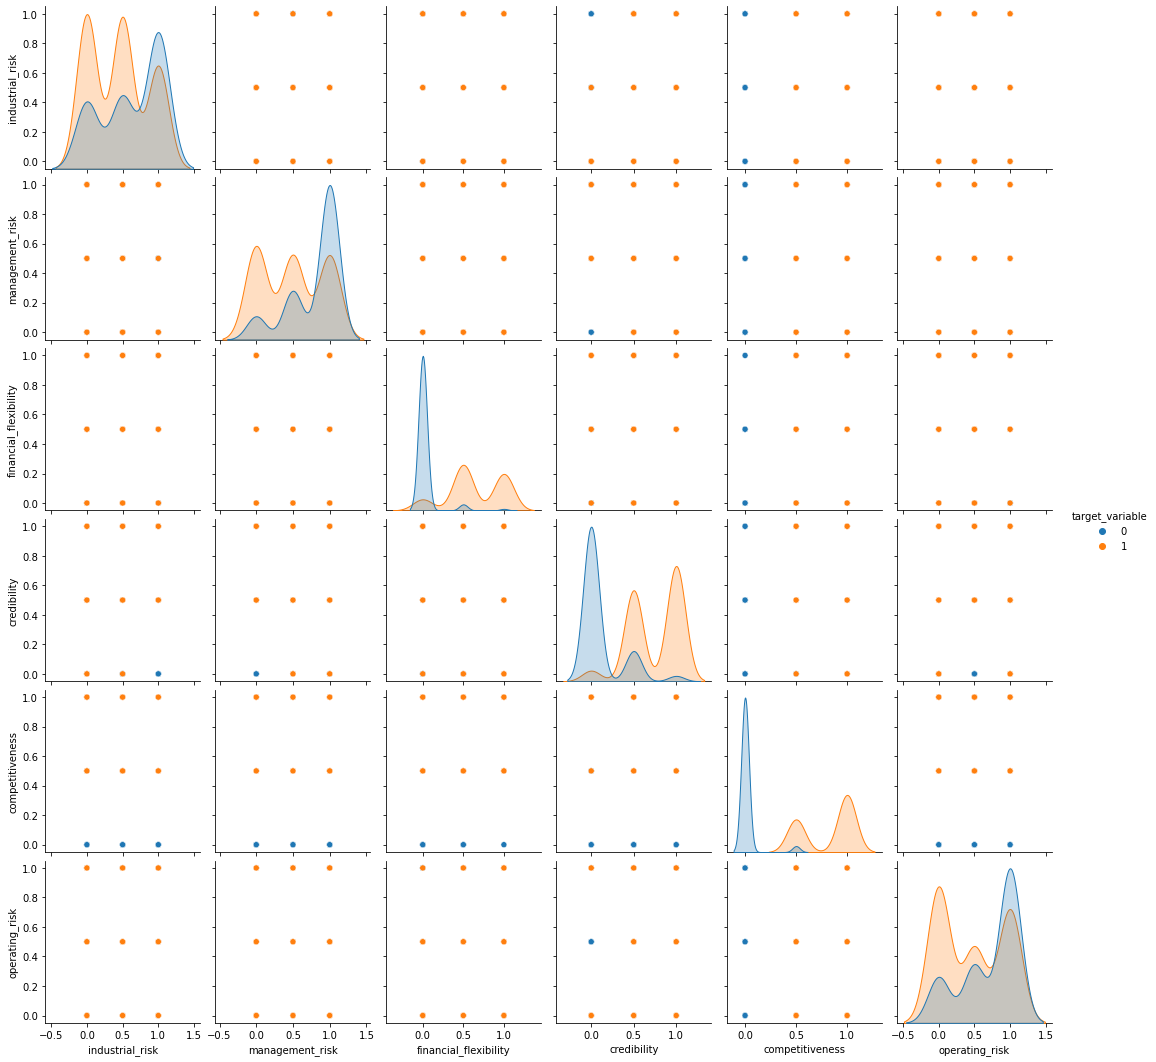

In [113]:
import seaborn as sns

sns.pairplot(DATA,hue='target_variable')

## Train Test Split

In [110]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,DATA['target_variable'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(n_neighbors=10)

In [123]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [124]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [125]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [126]:
print(confusion_matrix(y_test,pred))

[[35  0]
 [ 0 40]]


In [127]:
y_test.count()

75

In [128]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        40

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [119]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,DATA,DATA['target_variable'],cv=10)
    accuracy_rate.append(score.mean())

In [120]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,DATA,DATA['target_variable'],cv=10)
    error_rate.append(1-score.mean())

In [121]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

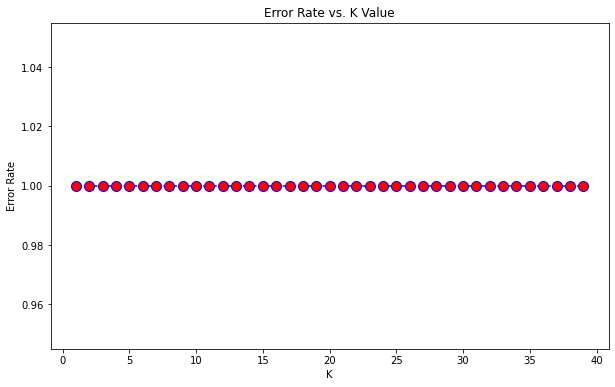

In [68]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [69]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[32  0]
 [ 0 43]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        43

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [70]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=2


[[32  0]
 [ 0 43]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        43

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

